In [1]:
!apt-get install -y \
    libgl1-mesa-dev \
    libgl1-mesa-glx \
    libglew-dev \
    libosmesa6-dev \
    software-properties-common
!apt-get install -y patchelf
!pip install git+https://github.com/Denys88/rl_games
!pip install envpool
!pip install gym
!pip install free-mujoco-py
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!pip install imageio==2.4.1
!pip install -U colabgymrender
from rl_games.torch_runner import Runner
!pip install gymnasium
!apt-get install x11-utils > /dev/null 2>&1 
!pip install pyglet > /dev/null 2>&1 
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
import os
os.environ["SDL_VIDEODRIVER"] = "dummy"
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!pip install --upgrade setuptools
!pip install ez_setup
!pip install gymnasium
import gymnasium as gym
!pip install git+https://github.com/eleurent/highway-env#egg=highway-env
!pip install git+https://github.com/eleurent/rl-agents#egg=rl-agents
!pip install moviepyA
!pip install imageio_ffmpeg
import sys
%load_ext tensorboard
!pip install tensorboardx gym pyvirtualdisplay
!apt-get install -y xvfb python-opengl ffmpeg
!git clone https://github.com/eleurent/highway-env.git 2> /dev/null
sys.path.insert(0, '/content/highway-env/scripts/')
from utils import show_videos
!pip install setuptools
!pip install --upgrade setuptools google-colab
!pip install -U pip
!pip install ez_setup
!pip install git+https://github.com/DLR-RM/stable-baselines3@feat/gymnasium-support
!pip install git+https://github.com/Stable-Baselines-Team/stable-baselines3-contrib@feat/gymnasium-support
!pip install stable_baselines3
!pip install stable_baselines3[extra]

Reading package lists... Done
Building dependency tree       
Reading state information... Done
software-properties-common is already the newest version (0.99.9.11).
The following additional packages will be installed:
  libgles-dev libgles1 libglew2.1 libglvnd-dev libopengl-dev libosmesa6
Suggested packages:
  glew-utils
The following NEW packages will be installed:
  libgl1-mesa-dev libgl1-mesa-glx libgles-dev libgles1 libglew-dev libglew2.1
  libglvnd-dev libopengl-dev libosmesa6 libosmesa6-dev
0 upgraded, 10 newly installed, 0 to remove and 24 not upgraded.
Need to get 3,438 kB of archives.
After this operation, 17.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 libgl1-mesa-glx amd64 21.2.6-0ubuntu0.1~20.04.2 [5,536 B]
Get:2 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 libgles1 amd64 1.3.2-1~ubuntu0.20.04.2 [10.3 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 libgles-dev amd64 1.3.2-1~ubun

/usr/local/lib/python3.9/dist-packages/google/rpc/__init__.py:20: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.rpc')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  pkg_resources.declare_namespace(__name__)
/usr/local/lib/python3.9/dist-packages/pkg_resources/__init__.py:2349: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(parent)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached setuptools-67.7.1-py3-none-any.whl (1.1 MB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.6.1
    Uninstalling setuptools-67.6.1:
      Successfully uninstalled setuptools-67.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
tensorflow 2.12.0 requires tensorboard<2.13,>=2.12, but you have tensorboard 2.11.2 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ez_setup: filename=ez_setup-0.9-py3-none-any.whl size=11012 sha256=63f

Streaming output truncated to the last 5000 lines.
|    n_updates              | 229      |
|    policy_objective       | 0.21     |
|    std                    | 0.261    |
|    value_loss             | 25       |
----------------------------------------
----------------------------------------
| rollout/                  |          |
|    ep_len_mean            | 764      |
|    ep_rew_mean            | 466      |
| time/                     |          |
|    fps                    | 448      |
|    iterations             | 231      |
|    time_elapsed           | 1053     |
|    total_timesteps        | 473088   |
| train/                    |          |
|    explained_variance     | 0.591    |
|    is_line_search_success | 1        |
|    kl_divergence_loss     | 0.00572  |
|    learning_rate          | 0.001    |
|    n_updates              | 230      |
|    policy_objective       | 0.202    |
|    std                    | 0.26     |
|    value_loss             | 35.2     |
------

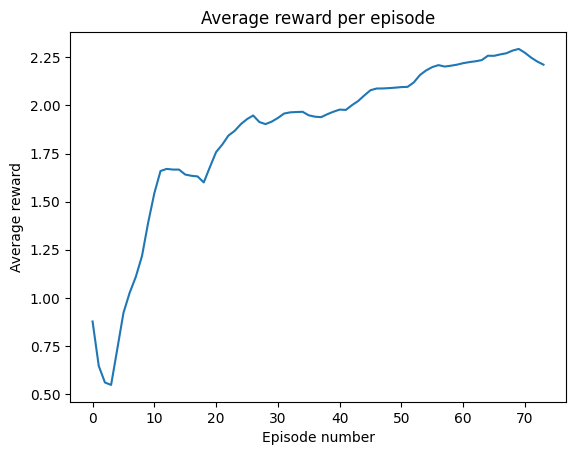

In [5]:
import  gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

from sb3_contrib import TRPO
from stable_baselines3.common.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise
env = gym.make("Ant-v2")
n_actions = env.action_space.shape[-1]
action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.1 * np.ones(n_actions))
model = TRPO('MlpPolicy', env,verbose=1 )
model.learn(int(1000000))
model.save("TRPO_ant2d")
env = model.get_env()
model = TRPO.load("TRPO_ant2d")
reward_arr = []
obs = env.reset()
done = False
while done != True :
    action, _states = model.predict(obs)
    obs, reward, term, info = env.step(action)
    reward_arr.append(reward)
    print(reward)
    done = term
plt.plot(np.cumsum(reward_arr)/ np.arange(1, len(reward_arr) + 1) )
plt.title("Average reward per episode")
plt.xlabel("Episode number")
plt.ylabel("Average reward")
plt.show()